In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn import ensemble
import tensorflow as tf

In [89]:
import scipy.io
mat = scipy.io.loadmat('MSdata.mat')

In [90]:
trainx = mat['trainx']

trainy = mat['trainy']

test = mat['testx']

In [91]:
trainx_df = pd.DataFrame(data = trainx, index = range(trainx.shape[0]), columns = range(trainx.shape[1]))

testx_df = pd.DataFrame(data = test, index = range(test.shape[0]), columns = range(test.shape[1]))

In [92]:
Y_train = np.array(trainy,copy= True)

In [93]:
#correlation 
#scaling

In [131]:
scaler = preprocessing.StandardScaler()
X_train = np.array(trainx_df.values, copy=True)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
test_scaled = scaler.transform(test)
#scaled_df = pd.DataFrame(X_train_scaled, columns= impu_enc_df.columns)

In [96]:
param_grid = {'alpha': np.logspace(-3, 3, 13)}
grid = GridSearchCV(lm.Lasso(), param_grid, cv=5,return_train_score=True,scoring='neg_mean_absolute_error')
grid.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-03, 3.16228e-03, 1.00000e-02, 3.16228e-02, 1.00000e-01,
       3.16228e-01, 1.00000e+00, 3.16228e+00, 1.00000e+01, 3.16228e+01,
       1.00000e+02, 3.16228e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [97]:
grid.best_score_

-6.801206782918072

In [98]:
final_model = grid.best_estimator_

In [134]:
y_lasso = final_model.predict(test_scaled)
y_lasso = np.round(y_lasso,0)

In [135]:
y_lasso_df = pd.DataFrame(y_lasso, index = range(1,y_lasso.shape[0]+1))
y_lasso_df.to_csv('y_lasso_df.csv',index_label = 'dataid',header=['prediction'])

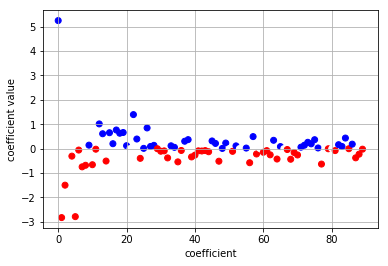

In [99]:
plt.scatter(range(X_train.shape[1]), final_model.coef_,
            c= np.sign(final_model.coef_), cmap="bwr_r")
plt.xlabel("coefficient")
plt.ylabel("coefficient value")
plt.grid()
plt.show()

In [100]:
param_grid = {'alpha': np.logspace(-3, 3, 13)}
#mae = mean_absolute_error()
grid_ridge = GridSearchCV(lm.Ridge(), param_grid, cv=5,return_train_score=True,scoring='neg_mean_absolute_error')
grid_ridge.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-03, 3.16228e-03, 1.00000e-02, 3.16228e-02, 1.00000e-01,
       3.16228e-01, 1.00000e+00, 3.16228e+00, 1.00000e+01, 3.16228e+01,
       1.00000e+02, 3.16228e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [101]:
grid_ridge.best_score_

-6.802007908101789

In [102]:
final_ridge_model = grid_ridge.best_estimator_

In [103]:
y_test = final_ridge_model.predict(test)

In [104]:
y_test_df = pd.DataFrame(y_test,index=range(1,y_test.shape[0]+1))

In [105]:
y_test_df.to_csv('y.csv',index_label = 'dataid',header=['prediction'])

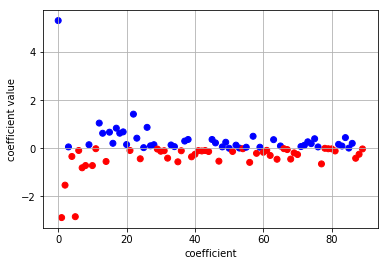

In [106]:
plt.scatter(range(X_train.shape[1]), final_ridge_model.coef_,
            c= np.sign(final_ridge_model.coef_), cmap="bwr_r")
plt.xlabel("coefficient")
plt.ylabel("coefficient value")
plt.grid()
plt.show()

In [107]:
y_test_df_rounded = y_test_df.round(0)

In [108]:
y_test_df_rounded.to_csv('y_round.csv',index_label = 'dataid',header=['prediction'])

In [109]:
final_ridge_model.coef_.shape

(1, 90)

In [125]:
top_features=np.abs(final_ridge_model.coef_[0]).argsort()[final_ridge_model.coef_.shape[0]-60:] 

In [126]:
top_features.shape

(59,)

In [127]:
X_train_top = X_train_scaled.T[top_features].T
test_top = test.T[top_features].T

In [128]:
param_grid = {'alpha': np.logspace(-3, 3, 13)}
#mae = mean_absolute_error()
grid_ridge_top = GridSearchCV(lm.Ridge(), param_grid, cv=5,return_train_score=True,scoring='neg_mean_absolute_error')
grid_ridge_top.fit(X_train_top, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-03, 3.16228e-03, 1.00000e-02, 3.16228e-02, 1.00000e-01,
       3.16228e-01, 1.00000e+00, 3.16228e+00, 1.00000e+01, 3.16228e+01,
       1.00000e+02, 3.16228e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [129]:
grid_ridge_top.best_score_

-6.80282806744626

In [130]:
y_top_feat_df = pd.DataFrame(y_top_feat,index=range(1,y_top_feat.shape[0]+1))

NameError: name 'y_top_feat' is not defined

In [ ]:
y_top_feat_df.to_csv('y_top_feat.csv',index_label = 'dataid',header=['prediction'])

In [136]:
#applying PCA

from sklearn import decomposition

pca = decomposition.PCA(n_components=20)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)

In [34]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],'n_estimators': [50,100, 150]}#,'max_depth': [50,100,150]}
rand_for_regr = ensemble.RandomForestRegressor(n_estimators=20,max_depth= 150,random_state=17)
RFC = GridSearchCV(rand_for_regr, param_grid, cv=5,return_train_score=True,scoring='neg_mean_absolute_error')
RFC.fit(X_train_pca, Y_train)

/Users/divyahindupur/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/divyahindupur/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/divyahindupur/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/divyahindupur/anaconda2/envs/py35/lib/python3

KeyboardInterrupt: 

In [137]:
rand_for_regr = ensemble.RandomForestRegressor(n_estimators=10,max_depth= 100,random_state=17)
rand_for_regr.fit(X_train_scaled,Y_train)
y_pred_train = rand_for_regr.predict(X_train_scaled)

/Users/divyahindupur/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [138]:
y_pred_train = np.round(y_pred_train,0)

In [139]:
from sklearn.metrics import mean_absolute_error
mae_rf_train = mean_absolute_error(Y_train,y_pred_train )


In [140]:
mae_rf_train

2.6768661785795156

In [141]:
#x_test_pca = pca.transform(test)
y_test_rf = rand_for_regr.predict(test)

In [142]:
y_test_rf_df = pd.DataFrame(y_test_rf,index=range(1,y_test_rf.shape[0]+1))
y_test_rf_df.to_csv('y_test_rf.csv',index_label = 'dataid',header=['prediction'])

In [56]:
param_grid = {'alpha': np.logspace(-3, 3, 13), 'l1_ratio': [0.2,0.4,0.6,0.8]}
grid_en = GridSearchCV(lm.ElasticNet(), param_grid, cv=5,return_train_score=True,scoring='neg_mean_absolute_error')
grid_en.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'l1_ratio': [0.2, 0.4, 0.6, 0.8], 'alpha': array([1.00000e-03, 3.16228e-03, 1.00000e-02, 3.16228e-02, 1.00000e-01,
       3.16228e-01, 1.00000e+00, 3.16228e+00, 1.00000e+01, 3.16228e+01,
       1.00000e+02, 3.16228e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [57]:
grid_en.best_score_

-6.80201980242248

In [60]:
grid_en.best_params_

{'alpha': 0.001, 'l1_ratio': 0.8}

In [58]:
y_en_pred = np.round(grid_en.predict(test),0)

In [59]:
y_en_pred_df = pd.DataFrame(y_en_pred,index=range(1,y_en_pred.shape[0]+1))
y_en_pred_df.to_csv('y_en_pred.csv',index_label = 'dataid',header=['prediction'])

In [63]:
grid_en_coef = grid_en.best_estimator_.coef_

In [65]:
#applying PCA

from sklearn import decomposition

pca = decomposition.PCA(n_components=25)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)

In [66]:
#build polynomial features
from sklearn.preprocessing import PolynomialFeatures

x_poly = PolynomialFeatures(include_bias=False)
x_train_pca_poly = x_poly.fit_transform(X_train_pca)

In [67]:
x_train_pca_poly.shape

(463715, 350)

In [68]:
param_grid = {'alpha': np.logspace(-3, 3, 13), 'l1_ratio': [0.7,0.8,0.9,1]}
grid_en_polypca = GridSearchCV(lm.ElasticNet(), param_grid, cv=5,return_train_score=True,scoring='neg_mean_absolute_error')
grid_en_polypca.fit(x_train_pca_poly, Y_train)

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf

n_train = int(0.8 * X_train.shape[0])
n_train_samples = X_train.shape[0]
# Parameters
learning_rate = 1e-1
epoch = 20
batch_size = 540
dropout_keep = 1
iterations = int(n_train/batch_size)

# Network Parameters
n_hidden_1 = 128 # 1st layer number of neurons
n_hidden_2 = 512 # 2nd layer number of neurons
n_hidden_3 = 1024 # 3rd layer number of neurons
n_hidden_4 = 512# 4th layer number of neurons
n_hidden_5 = 256# 4th layer number of neurons
n_input = X_train.shape[1] # input dimension
n_classes = 1 # output

#Initialize the graph
tf.reset_default_graph()

# tf Graph input
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])
keep_prob = tf.placeholder("float")

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1], stddev = 1/n_train_samples)),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], stddev = 1/n_train_samples)),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3], stddev = 1/n_train_samples)),
    'h4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4], stddev = 1/n_train_samples)),
    'h5': tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5], stddev = 1/n_train_samples)),
    'out': tf.Variable(tf.random_normal([n_hidden_4, n_classes], stddev = 1/n_train_samples))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1], stddev = 1/n_train_samples)),
    'b2': tf.Variable(tf.random_normal([n_hidden_2], stddev = 1/n_train_samples)),
    'b3': tf.Variable(tf.random_normal([n_hidden_3], stddev = 1/n_train_samples)),
    'b4': tf.Variable(tf.random_normal([n_hidden_4], stddev = 1/n_train_samples)),
    'b5': tf.Variable(tf.random_normal([n_hidden_5], stddev = 1/n_train_samples)),
    'out': tf.Variable(tf.random_normal([n_classes], stddev = 1/n_train_samples))
}

def mlp(x, keep_prob):
    layer_1_a = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1_b = tf.nn.relu(layer_1_a)
    layer_1 = tf.nn.dropout(layer_1_b, keep_prob=keep_prob)
    
    
    layer_2_a = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2_b = tf.nn.leaky_relu(layer_2_a)
    layer_2 = tf.nn.dropout(layer_2_b, keep_prob=keep_prob)

    
    layer_3_a = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3_b = tf.nn.relu(layer_3_a)
    layer_3 = tf.nn.dropout(layer_3_b, keep_prob=keep_prob)

    layer_4_a = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4_b = tf.nn.relu(layer_4_a)
    layer_4 = tf.nn.dropout(layer_4_b, keep_prob= keep_prob)
    
#     layer_5_a = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
#     layer_5_b = tf.nn.relu(layer_5_a)
#     layer_5 = tf.nn.dropout(layer_5_b, keep_prob= keep_prob)
    
    output_a = tf.add(tf.matmul(layer_4, weights['out']), biases['out'])
    output = output_a
    return output

#Loss and Optimizer function
logits = mlp(X, keep_prob)
loss = tf.reduce_mean(tf.abs(tf.subtract(logits, Y)))
#loss = tf.metrics.mean_absolute_error(Y, logits)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss)


# Initializing the variables
init = tf.global_variables_initializer()

#Saving the graph
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    
    
    for epc in range(epoch):
        avg_loss = 0
        train_idx = np.arange(X_train.shape[0])
        np.random.shuffle(train_idx)
        X_train_sub = X_train[train_idx[:n_train]]
        y_train_sub = Y_train[train_idx[:n_train]]
        X_valid = X_train[train_idx[n_train:]]
        y_valid = Y_train[train_idx[n_train:]]
        for itr in range(iterations):
            x_batch = X_train_sub[itr * batch_size: (1 + itr) * batch_size]
            y_batch = y_train_sub[itr * batch_size: (1 + itr) * batch_size]
            
            _, loss_val = sess.run([train_op, loss], feed_dict= {X:x_batch, Y:y_batch, keep_prob:dropout_keep})
            
            avg_loss += loss_val
        #print(sess.run([logits], feed_dict={X: X_test}))
        print("epoch:{}, avg training loss:{}".format(epc+1, avg_loss/iterations))
        sub_test_loss = sess.run([loss], feed_dict={X:X_valid, Y:y_valid, keep_prob:1})
        print("Validation loss:{}".format(sub_test_loss[0]))
    
    saver.save(sess, "/tmp/model.ckpt")
    #test_loss = sess.run([loss], feed_dict = {X:X_valid, Y:y_valid, keep_prob:1})
    #print("total test loss: {}".format(test_loss))


In [144]:
from sklearn.model_selection import train_test_split as sksplit 
train_x,text_x,train_y,test_y = sksplit(X_train_scaled,Y_train,random_state=1,train_size=0.7)

grad_bos_regr = ensemble.GradientBoostingRegressor()
grad_bos_regr.fit(train_x, train_y)
print("Gradient Boosting Regressor training score:",
      grad_bos_regr.score(train_x, train_y))
print("Gradient Boosting Regressor test score:",
      grad_bos_regr.score(text_x, test_y))

/Users/divyahindupur/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/divyahindupur/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Regressor training score: 0.2798603579377704
Gradient Boosting Regressor test score: 0.278270426481388


In [ ]:
#from sklearn.model_selection import train_test_split as sksplit 
#train_x,text_x,train_y,test_y = sksplit(X_train_scaled,Y_train,random_state=1,train_size=0.7)

grad_bos_regr_1 = ensemble.GradientBoostingRegressor(criterion='mae')
grad_bos_regr_1.fit(train_x, train_y)
print("Gradient Boosting Regressor training score:",
      grad_bos_regr_1.score(train_x, train_y))
print("Gradient Boosting Regressor test score:",
      grad_bos_regr_1.score(text_x, test_y))

/Users/divyahindupur/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [145]:
grad_bos_regr.criterion

'friedman_mse'

In [147]:
train_y_pred_gba = grad_bos_regr.predict(train_x)
test_y_pred_gba = grad_bos_regr.predict(text_x)

In [150]:
mae_gba_train = mean_absolute_error(train_y,train_y_pred_gba )
mae_gba_train

6.550317506905182

In [151]:
mae_gba_test = mean_absolute_error(test_y,test_y_pred_gba )
mae_gba_test

6.557527980063004

In [152]:
y_gba = grad_bos_regr.predict(test_scaled)

In [153]:
y_gba= np.round(y_gba,0)

In [154]:
y_gba_df = pd.DataFrame(y_gba,index = range(1,y_gba.shape[0]+1))
y_gba_df.to_csv('y_gba_df.csv',index_label = 'dataid',header=['prediction'])
#y_test_rf_df.to_csv('y_test_rf.csv',index_label = 'dataid',header=['prediction'])

In [155]:
pca_10 = decomposition.PCA(n_components=10)
pca_10.fit(X_train_scaled)
X_train_pca10 = pca_10.transform(X_train_scaled)

In [156]:
X_train_pca10.shape

(463715, 10)

In [159]:
from sklearn.ensemble import AdaBoostRegressor #For Regression
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor() 
#clf = AdaBoostClassifier(n_estimators=100, base_estimator=dt,learning_rate=1)
ada_bos_regr = ensemble.AdaBoostRegressor(n_estimators=10, base_estimator=dt,learning_rate=1)
ada_bos_regr.fit(train_x, train_y)
print("AdaBoosting Regressor training score:",
      ada_bos_regr.score(train_x, train_y))
print("AdaBoosting Regressor test score:",
      ada_bos_regr.score(text_x, test_y))

/Users/divyahindupur/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoosting Regressor training score: 0.9938189761259647
AdaBoosting Regressor test score: 0.18092861320002307


In [162]:
train_y_pred_ada = ada_bos_regr.predict(train_x)
test_y_pred_ada = ada_bos_regr.predict(text_x)

In [163]:
mae_ada_train = mean_absolute_error(train_y,train_y_pred_ada )
print("The ADA Boosting train score ",mae_ada_train)
mae_ada_test = mean_absolute_error(test_y,test_y_pred_ada )
print("The ADA Boosting test score ",mae_ada_test)

The ADA Boosting train score  0.21198706099815157
The ADA Boosting test score  6.619717499910147


In [164]:
y_ada = ada_bos_regr.predict(test_scaled)
y_ada = np.round(y_ada,0)

In [165]:
y_ada_df = pd.DataFrame(y_ada,index = range(1,y_ada.shape[0]+1))
y_ada_df.to_csv('y_ada_df.csv',index_label = 'dataid',header=['prediction'])
#y_test_rf_df.to_csv('y_test_rf.csv',index_label = 'dataid',header=['prediction'])

In [166]:
ada_gba_bos_regr = ensemble.AdaBoostRegressor(n_estimators=10, base_estimator=grad_bos_regr,learning_rate=1)
ada_gba_bos_regr.fit(train_x, train_y)
print("AdaBoosting Regressor training score:",
      ada_bos_regr.score(train_x, train_y))
print("AdaBoosting Regressor test score:",
      ada_bos_regr.score(text_x, test_y))

/Users/divyahindupur/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoosting Regressor training score: 0.9938189761259647
AdaBoosting Regressor test score: 0.18092861320002307


In [168]:
train_y_pred_ada_gba = ada_gba_bos_regr.predict(train_x)
test_y_pred_ada_gba = ada_gba_bos_regr.predict(text_x)

In [169]:
mae_ada_train = mean_absolute_error(train_y,train_y_pred_ada_gba )
print("The ADA Boosting train score ",mae_ada_train)
mae_ada_test = mean_absolute_error(test_y,test_y_pred_ada_gba )
print("The ADA Boosting test score ",mae_ada_test)

The ADA Boosting train score  7.738265520452795
The ADA Boosting test score  7.741846805096484


In [167]:
y_ada_gba = ada_gba_bos_regr.predict(test_scaled)
y_ada_gba = np.round(y_ada_gba,0)

In [170]:
y_ada_gba_df = pd.DataFrame(y_ada_gba,index = range(1,y_ada_gba.shape[0]+1))
y_ada_gba_df.to_csv('y_ada_gba_df.csv',index_label = 'dataid',header=['prediction'])
#y_test_rf_df.to_csv('y_test_rf.csv',index_label = 'dataid',header=['prediction'])